In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot


In [2]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

In [3]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


In [4]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


In [5]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


In [6]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [7]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [8]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [9]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [10]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

In [11]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


In [12]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max())
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max())
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max())
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max())
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0
Intervalo Overall:     [ 1.0   -    755000.0
Intervalo Floor:       [ 334.0   -    755000.0
Intervalo Rooms:       [ 2.0   -    755000.0
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


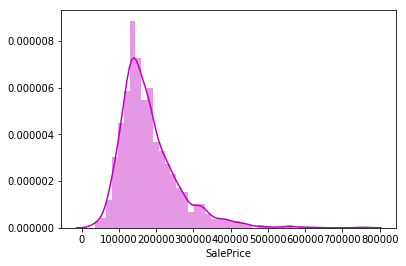

In [13]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


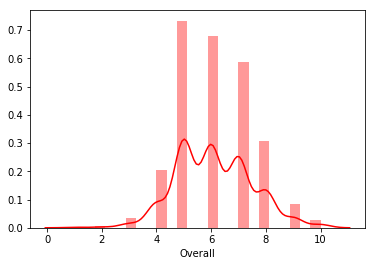

In [14]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


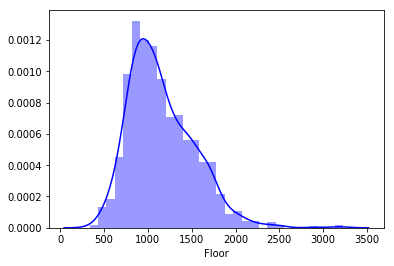

In [15]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


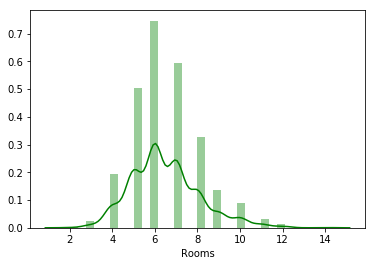

In [16]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


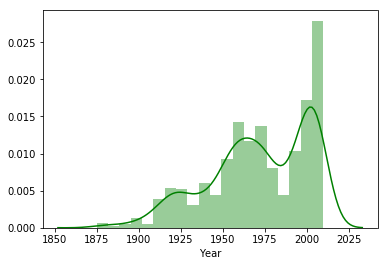

In [17]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


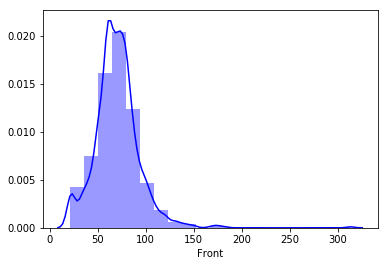

In [18]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y

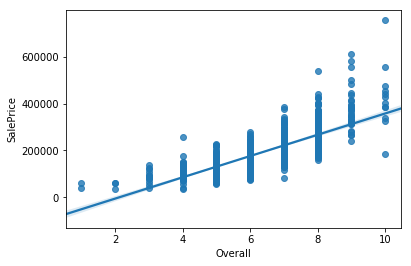

In [24]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

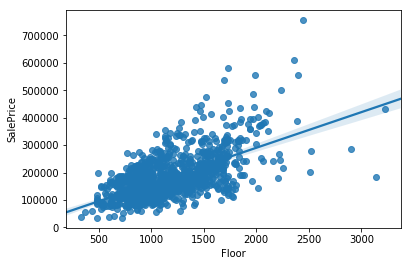

In [25]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

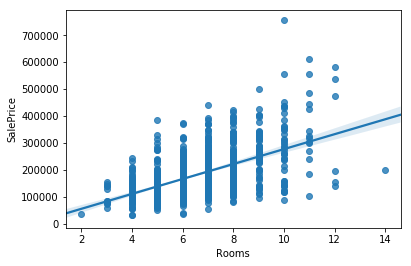

In [27]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

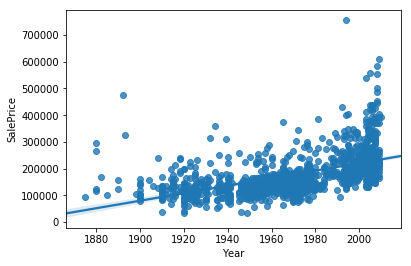

In [29]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

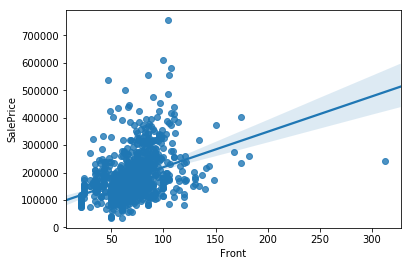

In [31]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion 

In [34]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    
    x=np.dot(argX,1)
    return x

regresionLineal(dfEntrenamiento["Overall"], 0, 0, 0, 0)

array([7., 6., 7., ..., 7., 8., 6.])

In [19]:
# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


